# Datetime

In [1]:
from datetime import datetime
from datetime import timedelta

# Time this lesson plan was written
lesson_date = datetime(2016, 3, 5, 23, 31, 1, 844089)

Exercise 1: Write a function to print the day of the week the lesson plan was written.

In [2]:
def day_of_week(date):
    days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    return days_of_week[date.weekday()]

day_of_week(lesson_date)

'Saturday'

Exercise 2: How do I get an object with the current time?

In [3]:
datetime.now()

datetime.datetime(2016, 11, 1, 10, 47, 13, 676433)

Exercise 3: What is the Gregorian ordinal representation of the date? Using this value, how many days ago was this lesson plan written?

In [5]:
datetime.now().toordinal() - lesson_date.toordinal()

241

Exercise 4: Try using `timedelta` to shift our DateTime object by the following intervals:
- 1 hour ahead
- 3 days ago
- 1 year, 3 days, 2 seconds ahead

In [6]:
lesson_date + timedelta(hours=1)

datetime.datetime(2016, 3, 6, 0, 31, 1, 844089)

In [7]:
lesson_date - timedelta(days=3)

datetime.datetime(2016, 3, 2, 23, 31, 1, 844089)

In [10]:
lesson_date + timedelta(days=368, seconds=2)

datetime.datetime(2017, 3, 8, 23, 31, 3, 844089)

# Timeseries

In [23]:
import pandas as pd
from datetime import timedelta
%pylab inline

df_goog = pd.read_csv('CSV/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [24]:
df_goog.describe()

,Open,High,Low,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,575.890686,609.268155,552.366753,584.801935,2.019245e+06,584.801935
std,56.597440,71.429837,64.162213,69.206444,6.682940e+05,69.206444
min,524.729980,541.412415,487.562195,520.510010,2.530000e+04,520.510010
25%,538.548111,565.495086,516.023072,538.463135,1.685675e+06,538.463135
50%,560.617554,581.727631,534.417419,559.487549,1.856900e+06,559.487549
75%,577.745132,639.383209,565.040634,600.655640,2.387900e+06,600.655640
max,747.109985,775.955017,745.630005,762.369995,3.290800e+06,762.369995


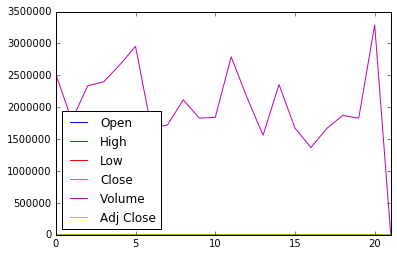

In [25]:
df_goog.plot()

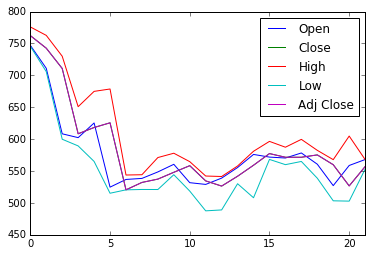

In [26]:
df_goog[['Open','Close','High','Low','Adj Close']].plot()

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [27]:
df_goog.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [28]:
df_goog

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000
5,2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985
6,2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010
7,2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985
8,2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027
9,2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441


Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [29]:
df_goog.sort_values('Date', inplace=True)
df_goog.set_index('Date', inplace=True)
df_goog.index = df_goog.index.to_datetime()


Let's add some more columns with useful data extracted from the DateTime index.

In [30]:
df_goog

,Open,High,Low,Close,Volume,Adj Close
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415
2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578
2014-06-02,560.702576,582.452637,538.752441,575.282593,1872200,575.282593
2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539
2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539
2014-09-02,571.852539,596.482666,568.212646,577.362610,1673200,577.362610
2014-10-01,576.012634,581.002625,508.102295,559.082520,2356400,559.082520
2014-11-03,555.502502,557.902527,530.082397,541.832458,1561200,541.832458
2014-12-01,538.902466,541.412415,489.002228,526.402405,2146700,526.402405


In [31]:
df_goog['Year'] = df_goog.index.year
df_goog['Month'] = df_goog.index.month
df_goog['Day'] = df_goog.index.day

In [32]:
df_goog.head(3)

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473,2014,3,27
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,1
2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,1


Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [33]:
df_goog['Closed_Higher'] = df_goog.Close > df_goog.Open

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [34]:
df_goog['2015']

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
2015-01-02,529.012390,542.172424,487.562195,534.522461,2791200,534.522461,2015,1,2,True
2015-02-02,531.732361,564.712585,518.552307,558.402588,1841600,558.402588,2015,2,2,True
2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441,2015,3,2,False
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,1,False
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,1,False
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,1,False
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,1,True
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3,False
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1,True
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,1,True


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

In [35]:
df_goog.index + timedelta(days=1)

DatetimeIndex(['2014-03-28', '2014-04-02', '2014-05-02', '2014-06-03',
               '2014-07-02', '2014-08-02', '2014-09-03', '2014-10-02',
               '2014-11-04', '2014-12-02', '2015-01-03', '2015-02-03',
               '2015-03-03', '2015-04-02', '2015-05-02', '2015-06-02',
               '2015-07-02', '2015-08-04', '2015-09-02', '2015-10-02',
               '2015-11-03', '2015-12-02'],
              dtype='datetime64[ns]', freq=None)

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [36]:
df_goog.index + timedelta(hours=1)

df_goog.index + timedelta(days=3)

df_goog.index - timedelta(days=4380, seconds=43)

DatetimeIndex(['2002-03-29 23:59:17', '2002-04-03 23:59:17',
               '2002-05-03 23:59:17', '2002-06-04 23:59:17',
               '2002-07-03 23:59:17', '2002-08-03 23:59:17',
               '2002-09-04 23:59:17', '2002-10-03 23:59:17',
               '2002-11-05 23:59:17', '2002-12-03 23:59:17',
               '2003-01-04 23:59:17', '2003-02-04 23:59:17',
               '2003-03-04 23:59:17', '2003-04-03 23:59:17',
               '2003-05-03 23:59:17', '2003-06-03 23:59:17',
               '2003-07-03 23:59:17', '2003-08-05 23:59:17',
               '2003-09-03 23:59:17', '2003-10-03 23:59:17',
               '2003-11-04 23:59:17', '2003-12-03 23:59:17'],
              dtype='datetime64[ns]', freq=None)

## Discussion: Date ranges and Frequencies

/home/useraj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


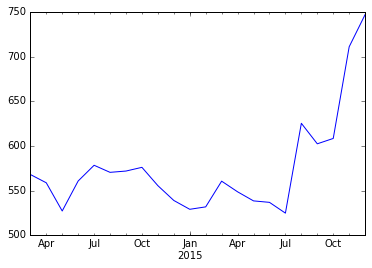

In [37]:
df_goog.Open.resample('M').plot()

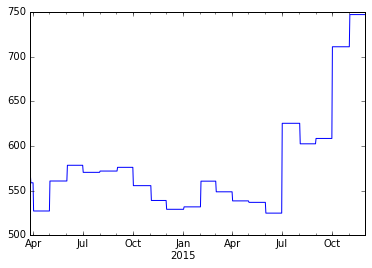

In [38]:
df_goog.Open.asfreq('D', method='backfill').plot()

/home/useraj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


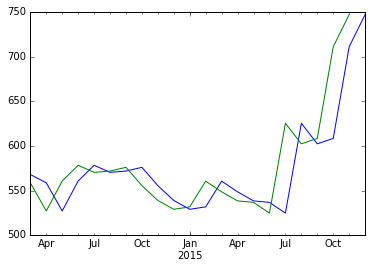

In [39]:
df_goog.Open.resample('M').plot()
df_goog.Open.asfreq('M', method='backfill').plot()

Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

In [40]:
index = pd.date_range('3/1/2016', '6/1/2016')

In [41]:
pd.date_range(start='3/1/2016', periods=20)

DatetimeIndex(['2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-12',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range(end='6/1/2016', periods=20)

DatetimeIndex(['2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
               '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-05-30', '2016-05-31', '2016-06-01'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [44]:
pd.date_range('3/7/2016 12:56:31', periods=6)

DatetimeIndex(['2016-03-07 12:56:31', '2016-03-08 12:56:31',
               '2016-03-09 12:56:31', '2016-03-10 12:56:31',
               '2016-03-11 12:56:31', '2016-03-12 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

In [46]:
march_2016 = pd.Period('2016-03', freq='M')

In [47]:
march_2016.start_time

Timestamp('2016-03-01 00:00:00')

In [48]:
march_2016.end_time

Timestamp('2016-03-31 23:59:59.999999999')

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.